<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

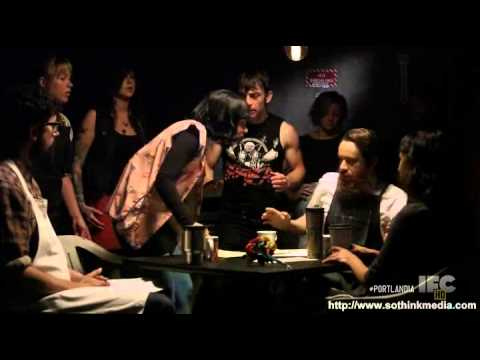

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [1]:
%pwd

'C:\\Users\\bayma\\Desktop\\Lambda_School\\Unit 4\\Sprint 1\\module 1\\DS-Unit-4-Sprint-1-NLP\\module1-text-data'

In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/main/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [12]:
shops['star_rating'] = shops['star_rating'].apply(lambda x: float(x.strip(' star rating')))

In [23]:
shops['full_review_text'] = shops['full_review_text'].apply(lambda x: x.strip(' 1234567890/'))

In [29]:
import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_lg")

# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [30]:
tokens = []

for doc in tokenizer.pipe(shops['full_review_text'], batch_size=500):
    doc_tokens = [token.text for token in doc]
    tokens.append(doc_tokens)

shops['tokens'] = tokens

In [31]:
shops['tokens'].head()

0    [check-in, Love, love, loved, the, atmosphere!...
1    [Listed, in, Date, Night:, Austin,, Ambiance, ...
2    [check-in, Listed, in, Brunch, Spots, I, loved...
3    [Very, cool, decor!, Good, drinks, Nice, seati...
4    [check-in, They, are, located, within, the, No...
Name: tokens, dtype: object

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [34]:
good_reviews = shops[shops['star_rating']>=4.0]
bad_reviews = shops[shops['star_rating']<4.0]

In [35]:
print('Total',len(shops))
print('Good Reviews:',len(good_reviews))
print('Bad Reviews:',len(bad_reviews))

Total 7616
Good Reviews: 6140
Bad Reviews: 1476


In [41]:
from collections import Counter
total_counts = Counter()
good_counts = Counter()
bad_counts = Counter()
shops['tokens'].apply(lambda x: total_counts.update(x))
good_reviews['tokens'].apply(lambda x: good_counts.update(x))
bad_reviews['tokens'].apply(lambda x: bad_counts.update(x))

print('Most Common words:', '\n', total_counts.most_common(10), '\n')
print('Most Common in Good Reviews', '\n', good_counts.most_common(10), '\n')
print('Most Common in Bad Reviews', '\n', bad_counts.most_common(10), '\n')

Most Common words: 
 [('the', 27779), ('and', 25748), ('a', 22085), ('I', 19780), ('to', 16904), (' ', 14988), ('of', 12495), ('is', 11748), ('was', 9539), ('in', 8901)] 

Most Common in Good Reviews 
 [('the', 21090), ('and', 20582), ('a', 17166), ('I', 14602), ('to', 12581), (' ', 11625), ('of', 9851), ('is', 9468), ('in', 7013), ('was', 6669)] 

Most Common in Bad Reviews 
 [('the', 6689), ('I', 5178), ('and', 5166), ('a', 4919), ('to', 4323), (' ', 3363), ('was', 2870), ('of', 2644), ('is', 2280), ('for', 1976)] 



The word counts seem to be pretty similar so far. I'll take out stop words and see if that changes anything.

In [42]:
# take count function from lecture
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [44]:
total = count(shops['tokens'])
good = count(good_reviews['tokens'])
bad = count(bad_reviews['tokens'])

Remove Stop Words

In [90]:
STOP_WORDS = nlp.Defaults.stop_words.union([' ', "it's", "i'm", "i've", "don't", 'like', 
                                            'good', 'great', 'coffee', 'place', 'love',
                                            'got', 'definitely', 'pretty', 'check-in',
                                            'best', 'austin'])

In [91]:
tokens = []

for doc in tokenizer.pipe(shops['full_review_text'], batch_size=500):
    doc_tokens = []
    for token in doc:
        if (token.text.lower() not in STOP_WORDS) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())
            
    tokens.append(doc_tokens)
shops['tokens'] = tokens

In [92]:
good_reviews = shops[shops['star_rating']>=4.0]
bad_reviews = shops[shops['star_rating']<4.0]

In [93]:
total = count(shops['tokens'])
good = count(good_reviews['tokens'])
bad = count(bad_reviews['tokens'])

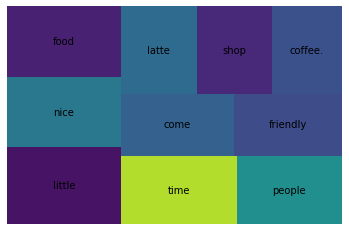

In [94]:
# top ten words in total
import squarify
import matplotlib.pyplot as plt

total_top10 = total[total['rank']<=10]

squarify.plot(sizes=total_top10['pct_total'], label=total_top10['word'])
plt.axis('off')
plt.show()

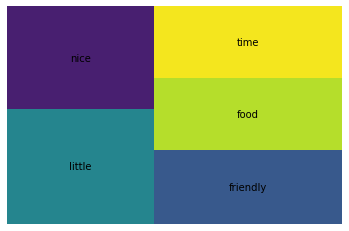

In [95]:
# top five words in good reviews

good_top5 = good[good['rank']<=5]

squarify.plot(sizes=good_top5['pct_total'], label=good_top5['word'])
plt.axis('off')
plt.show()

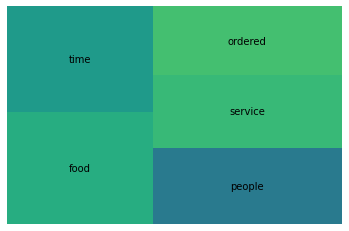

In [96]:
# top five words in bad reviews

bad_top5 = bad[bad['rank']<=5]

squarify.plot(sizes=bad_top5['pct_total'], label=bad_top5['word'])
plt.axis('off')
plt.show()

Both good and bad reviews seem to mention the overall quality of sevrvie. Time, people, service come up a lot in both categories.

## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


In [137]:
good.sort_values(by='appears_in_pct', ascending=False)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
590,little,1027,1230,1.0,0.004536,0.004536,0.167264
150,friendly,986,1014,3.0,0.003740,0.012336,0.160586
203,nice,962,1101,2.0,0.004060,0.008596,0.156678
327,check-ins,929,930,7.0,0.003430,0.026597,0.151303
450,time,835,994,5.0,0.003666,0.019668,0.135993
...,...,...,...,...,...,...,...
16615,condescending.,1,1,20375.0,0.000004,0.954204,0.000163
16614,essence.,1,1,20374.0,0.000004,0.954200,0.000163
16619,giraffe,1,1,20373.0,0.000004,0.954196,0.000163
16623,"tabacco,",1,1,20372.0,0.000004,0.954193,0.000163


In [138]:
bad.sort_values(by='appears_in_pct', ascending=False)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
127,food,266,369,1.0,0.004693,0.004693,0.180217
212,time,264,351,2.0,0.004464,0.009157,0.178862
1,service,261,314,4.0,0.003993,0.017309,0.176829
516,people,247,327,3.0,0.004159,0.013315,0.167344
363,ordered,240,296,5.0,0.003764,0.021073,0.162602
...,...,...,...,...,...,...,...
7857,mode.,1,1,9454.0,0.000013,0.922575,0.000678
7858,robot,1,1,9453.0,0.000013,0.922562,0.000678
7852,"provide,",1,1,9452.0,0.000013,0.922550,0.000678
7866,girth.,1,1,9451.0,0.000013,0.922537,0.000678


In [145]:
good['pct_in_good'] = good['pct_total']
bad['pct_in_bad'] = bad['pct_total']

In [147]:
good_words = good[['word', 'pct_in_good']]
bad_words = bad[['word', 'pct_in_bad']]

df = good_words.merge(bad_words, how='outer', on='word')

In [152]:
import numpy as np
df = df.replace(np.nan, 0)

In [155]:
df['difference'] = df['pct_in_good'] - df['pct_in_bad']

In [157]:
# These are the words that showed up most in bad reviews but not in good
df.sort_values(by='difference')[:10]

,word,pct_in_good,pct_in_bad,difference
366,asked,0.000450,0.002467,-0.002017
53,didn't,0.001778,0.003714,-0.001936
25,service,0.002209,0.003993,-0.001784
27,ordered,0.002157,0.003764,-0.001607
133,wasn't,0.001092,0.002594,-0.001503
46,order,0.001818,0.003218,-0.001399
255,said,0.000620,0.001984,-0.001364
280,customer,0.000579,0.001933,-0.001354
217,maybe,0.000715,0.002060,-0.001345
339,minutes,0.000490,0.001704,-0.001214


In [158]:
# These are the words that showed up most in good reviews but not in bad
df.sort_values(by='difference', ascending=False)[:10]

,word,pct_in_good,pct_in_bad,difference
6,check-ins,0.003430,0.001272,0.002158
2,friendly,0.003740,0.001666,0.002074
21,delicious,0.002449,0.000432,0.002016
22,favorite,0.002331,0.000623,0.001708
34,perfect,0.002047,0.000420,0.001627
16,super,0.002829,0.001374,0.001455
0,little,0.004536,0.003167,0.001369
5,latte,0.003500,0.002226,0.001274
10,iced,0.003242,0.002098,0.001143
39,gelato,0.001951,0.000814,0.001137


## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

